In [426]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

from pandas import read_csv, DataFrame
import pandas as pd
import sys
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import numpy as np

plt.style.use('seaborn')

In [427]:
# Get the CSV data here and print head
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [428]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [429]:
#remove cust id as it is not required

df.drop(["customerID"], axis = 1, inplace = True)

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [431]:
df.shape

(7043, 20)

In [432]:
#checking for duplicates
df.dropna(inplace = True)

In [433]:
df[df.duplicated()].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No


In [434]:
df.drop_duplicates(keep='first',inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [435]:
df.shape

(7021, 20)

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


0    5880
1    1141
Name: SeniorCitizen, dtype: int64


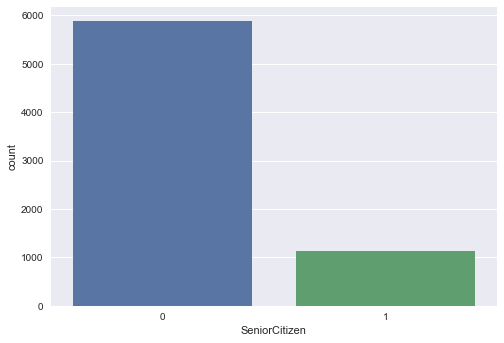

In [437]:
#checking fr missing values
import seaborn as sns  
location=sns.countplot(x="SeniorCitizen", data=df)
print(df["SeniorCitizen"].value_counts())

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


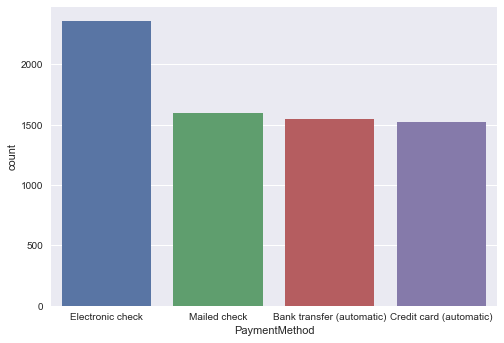

In [438]:
#checking fr missing values
import seaborn as sns  
location=sns.countplot(x="PaymentMethod", data=df)
print(df["PaymentMethod"].value_counts())
#electronic check is the most popular payment method

Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64


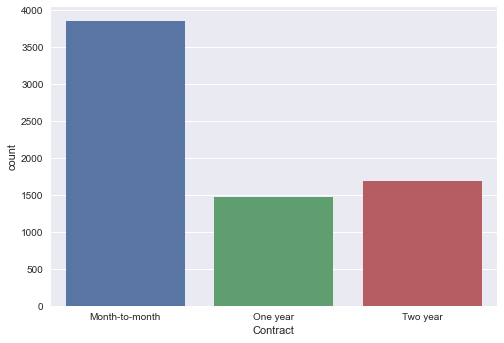

In [439]:
#checking fr missing values
import seaborn as sns  
location=sns.countplot(x="Contract", data=df)
print(df["Contract"].value_counts())
#Most of the cusotmers have opted for a month to month contract instead of a year
#offers miht be needed to push yearly contracts

0    5880
1    1141
Name: SeniorCitizen, dtype: int64


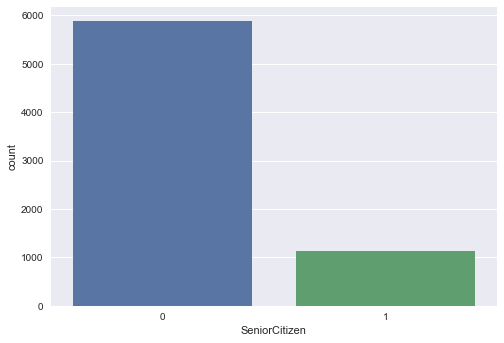

In [440]:
#checking fr missing values
import seaborn as sns  
location=sns.countplot(x="SeniorCitizen", data=df)
print(df["SeniorCitizen"].value_counts())


1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


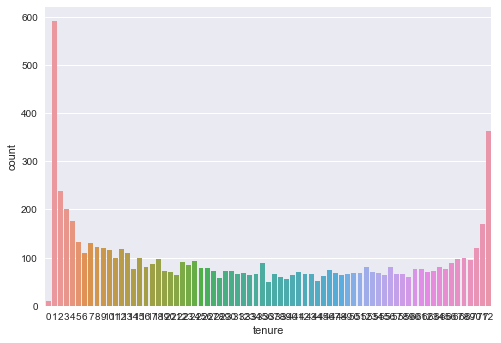

In [441]:
#checking for tenure
import seaborn as sns  
location=sns.countplot(x="tenure", data=df)
print(df["tenure"].value_counts())
#As you can see max tenure is 1

No     5164
Yes    1857
Name: Churn, dtype: int64


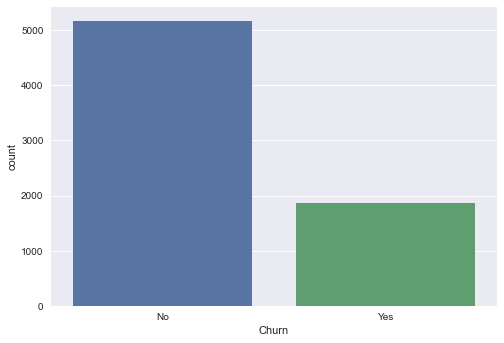

In [442]:
#churn distribution
import seaborn as sns  
location=sns.countplot(x="Churn", data=df)
print(df["Churn"].value_counts())
#As you can see there is little churn of 1857 people
#Majority of the people stick to the provider an dont cancel the subscription

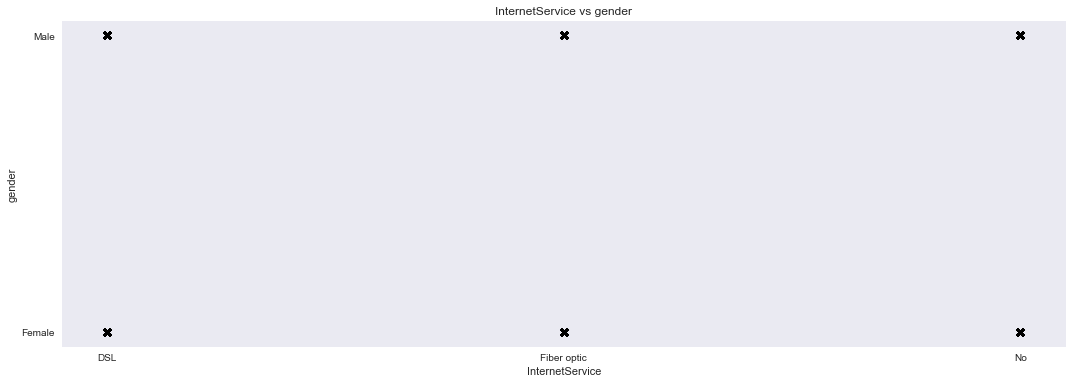

In [443]:
plt.figure(figsize=(18, 6))
plt.title("InternetService vs gender")

plt.grid()
plt.scatter(df['InternetService'] , df['gender'], c='k', marker='x')
plt.xlabel("InternetService")
plt.ylabel("gender")
plt.show()
#there is a relation between WindGustSpeed and WindSpeed3pm

In [444]:
df.select_dtypes(include=['object']).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [445]:
#thus we see total charges is mentiones as object type data.we need to convert to numerical

In [446]:
# changeing into numerical for all categorical columns
df['gender'].replace({'Male': 0, 'Female': 1},inplace = True)
df['Partner'].replace({'No': 0, 'Yes': 1},inplace = True)
df['Dependents'].replace({'No': 0, 'Yes': 1},inplace = True)
df['PhoneService'].replace({'No': 0, 'Yes': 1},inplace = True)
df['MultipleLines'].replace({'No': 0, 'Yes': 1, 'No phone service': 2},inplace = True)
df['InternetService'].replace({'DSL': 0, 'Fiber optic': 1, 'No':2},inplace = True)
df['OnlineSecurity'].replace({'No': 0, 'Yes': 1, 'No internet service': 2},inplace = True)
df['OnlineBackup'].replace({'No': 0, 'Yes': 1, 'No internet service': 2},inplace = True)
df['DeviceProtection'].replace({'No': 0, 'Yes': 1, 'No internet service': 2},inplace = True)
df['TechSupport'].replace({'No': 0, 'Yes': 1, 'No internet service': 2},inplace = True)
df['StreamingTV'].replace({'No': 0, 'Yes': 1, 'No internet service': 2},inplace = True)
df['StreamingMovies'].replace({'No': 0, 'Yes': 1, 'No internet service': 2},inplace = True)
df['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2},inplace = True)

In [447]:
# changeing into numerical for all categorical columns
df['PaperlessBilling'].replace({'No': 0, 'Yes': 1},inplace = True)
df['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1,'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}, inplace = True)
df['Churn'].replace({'No': 0, 'Yes': 1},inplace = True)

<AxesSubplot:>

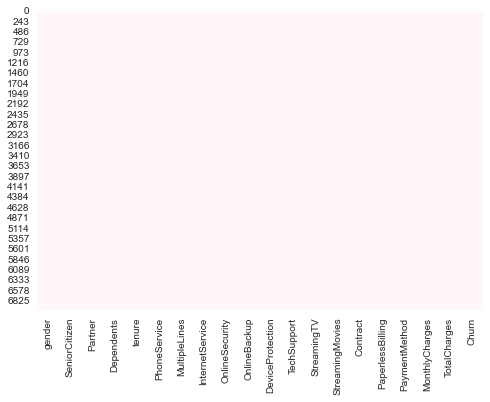

In [448]:
# Checking Missing Data Pattern 
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [464]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()
#as we can see, there are no missing values

,Total,Percent
gender,0,0.0
SeniorCitizen,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0


In [465]:
#convrting total charges and churn to numerical as it is listed in object type of data as listed above
try:
    df['TotalCharges'] = df['TotalCharges'].astype(float)
except ValueError as ve:
    print (ve)

In [466]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
#Fill the missing values with with the mean value
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

2290.353388    11
19.750000       9
20.200000       8
19.900000       7
19.650000       7
               ..
6849.400000     1
692.350000      1
130.150000      1
3211.900000     1
6844.500000     1
Name: TotalCharges, Length: 6531, dtype: int64


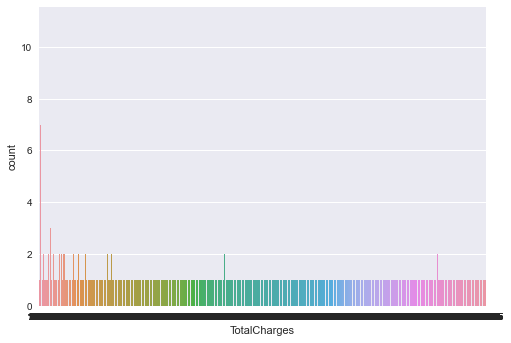

In [467]:
#checking fr missing values
import seaborn as sns  
location=sns.countplot(x="TotalCharges", data=df)
print(df["TotalCharges"].value_counts())

In [468]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [469]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,0,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7039,1,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7040,1,0,1,1,11,0,2,0,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,0,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,306.60,1
7042,0,0,0,0,66,1,0,1,1,0,1,1,1,1,2,1,2,105.65,6844.50,0


0    3853
2    1695
1    1473
Name: Contract, dtype: int64


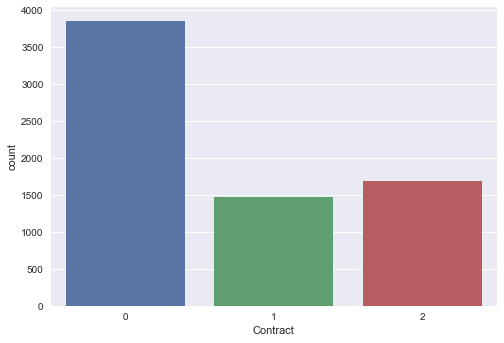

In [470]:
#checking fr missing values
import seaborn as sns  
location=sns.countplot(x="Contract", data=df)
print(df["Contract"].value_counts())

<AxesSubplot:>

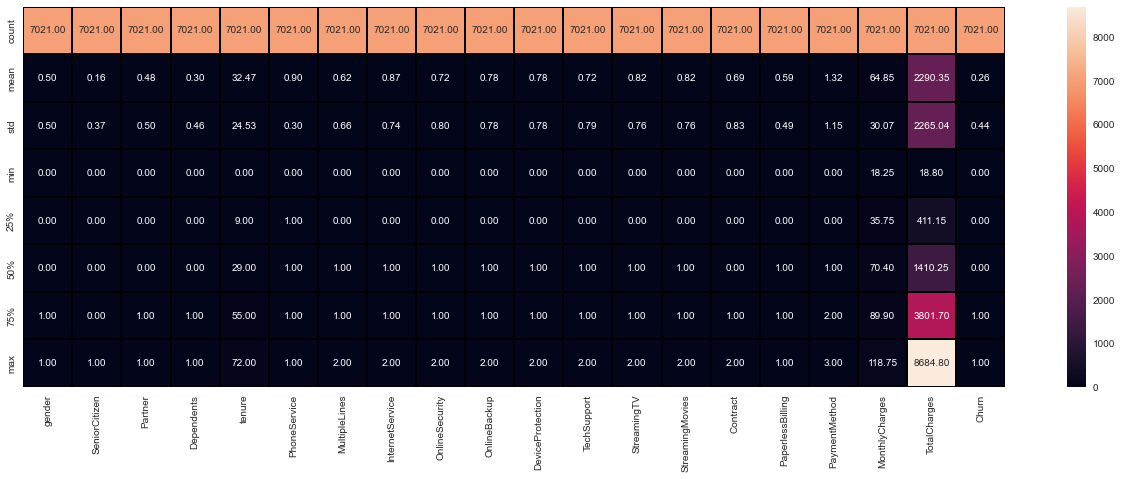

In [471]:
#correlation matrix to check correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

<AxesSubplot:>

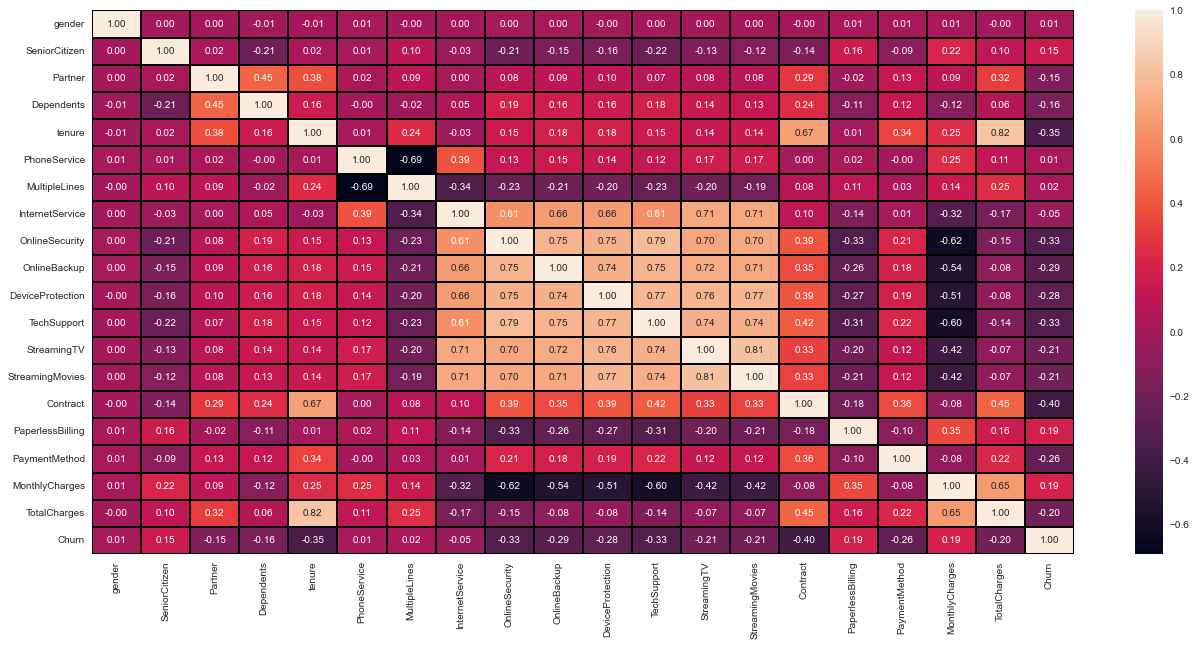

In [472]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

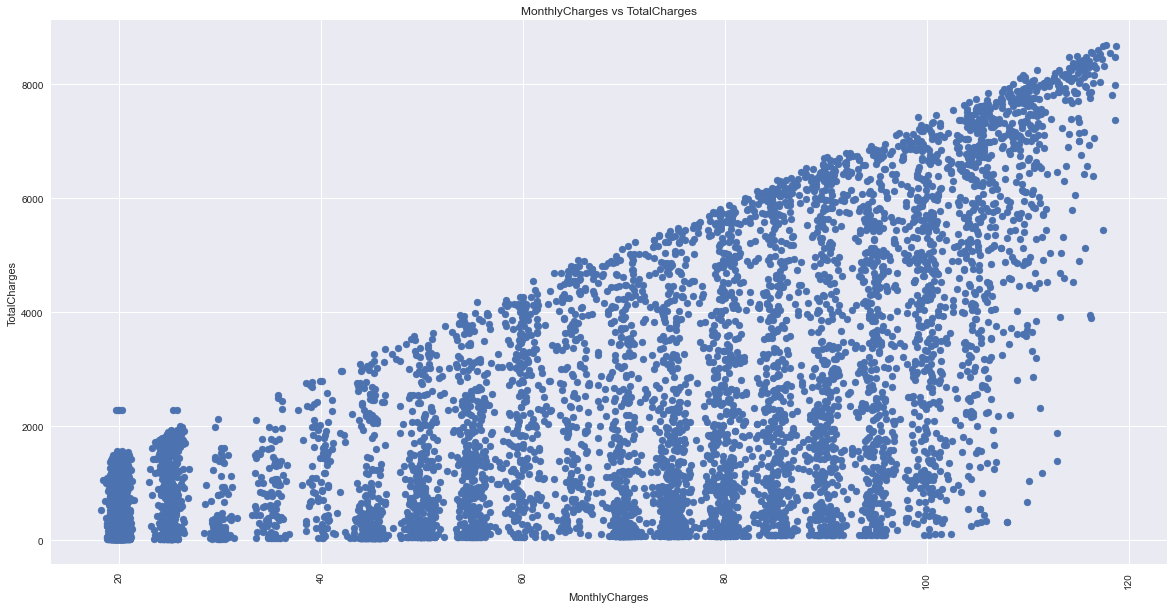

In [473]:
#'MonthlyCharges vs TotalCharges'
plt.figure(figsize = (20,10))
plt.title('MonthlyCharges vs TotalCharges')
plt.scatter(df['MonthlyCharges'], df['TotalCharges'])
plt.xticks
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.xticks(rotation = 90)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

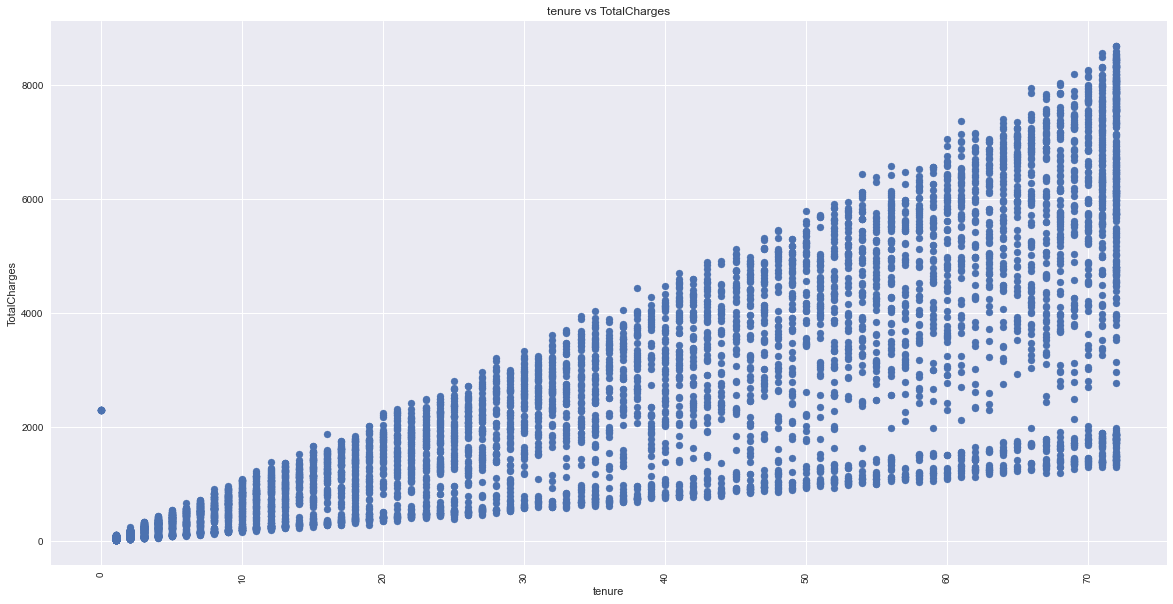

In [474]:
#'total charges vs tenure'
plt.figure(figsize = (20,10))
plt.title('tenure vs TotalCharges')
plt.scatter(df['tenure'], df['TotalCharges'])
plt.xticks
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.xticks(rotation = 90)
#as tenure icreases, so do the chrges

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

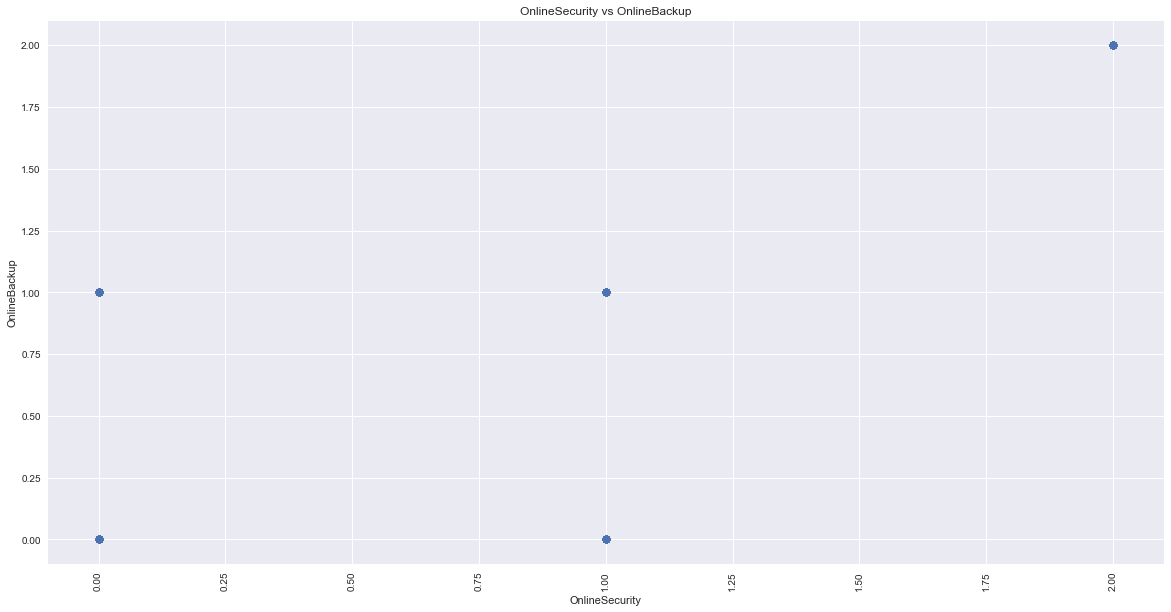

In [475]:
#OnlineBackup vs OnlineSecurity
plt.figure(figsize = (20,10))
plt.title('OnlineSecurity vs OnlineBackup')
plt.scatter(df['OnlineSecurity'], df['OnlineBackup'])
plt.xticks
plt.xlabel('OnlineSecurity')
plt.ylabel('OnlineBackup')
plt.xticks(rotation = 90)
#there is not much realtion between the two

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int64  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   int64  
 7   InternetService   7021 non-null   int64  
 8   OnlineSecurity    7021 non-null   int64  
 9   OnlineBackup      7021 non-null   int64  
 10  DeviceProtection  7021 non-null   int64  
 11  TechSupport       7021 non-null   int64  
 12  StreamingTV       7021 non-null   int64  
 13  StreamingMovies   7021 non-null   int64  
 14  Contract          7021 non-null   int64  
 15  PaperlessBilling  7021 non-null   int64  
 16  PaymentMethod     7021 non-null   int64  


<AxesSubplot:xlabel='count', ylabel='InternetService'>

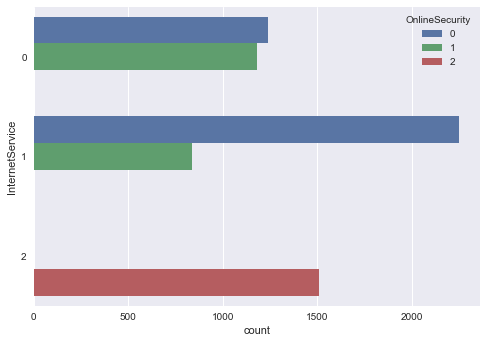

In [477]:
sns.countplot(y='InternetService', hue='OnlineSecurity', data=df)
#OnlineSecurity vs InternetService

#Majorly people  online security is not there for DSL provider services
#Majorly No online security is there for optic cable services


<AxesSubplot:xlabel='count', ylabel='DeviceProtection'>

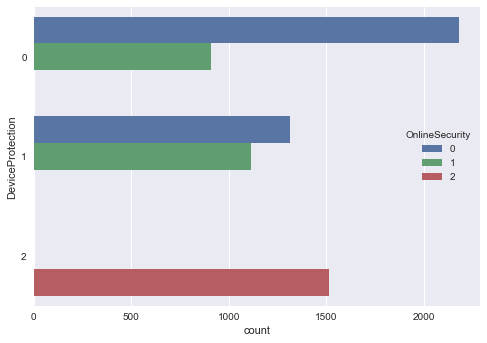

In [478]:
#DeviceProtection vs OnlineSecurity
sns.countplot(y='DeviceProtection', hue='OnlineSecurity', data=df)

#Majority who have opted for No device protection also have opted for no online security service
#Majority who have opted for device protection , not neceaasarily have opted for online security

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

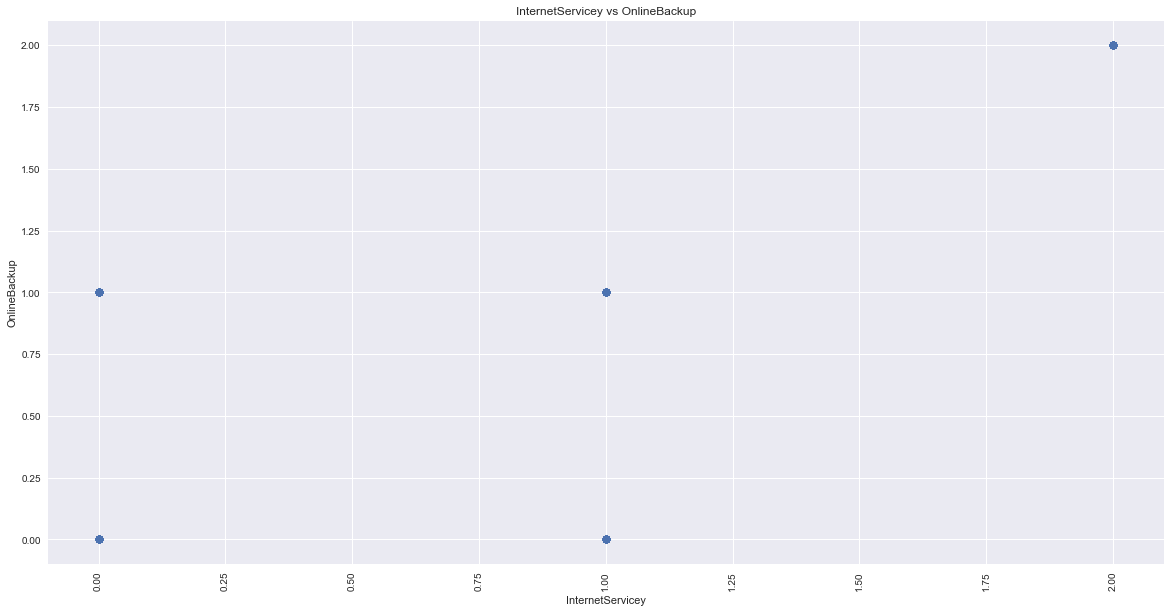

In [479]:
#OnlineBackup and InternetService

plt.figure(figsize = (20,10))
plt.title('InternetServicey vs OnlineBackup')
plt.scatter(df['InternetService'], df['OnlineBackup'])
plt.xticks
plt.xlabel('InternetServicey')
plt.ylabel('OnlineBackup')
plt.xticks(rotation = 90)
#there is not much realtion between the two

<AxesSubplot:xlabel='count', ylabel='DeviceProtection'>

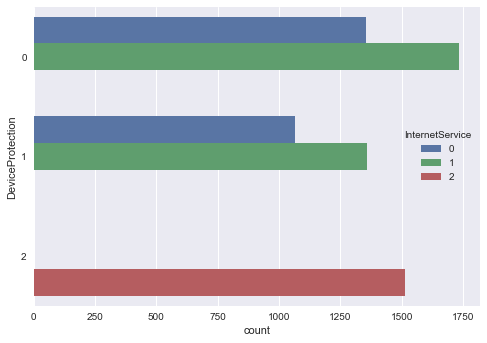

In [480]:
#DeviceProtection vs InternetService
sns.countplot(y='DeviceProtection', hue='InternetService', data=df)
#The consumers wno have not opted for devce protection services for DSL and optic are more than those who have 
#opted for Device protection for DSL and optic cable

<AxesSubplot:xlabel='count', ylabel='TechSupport'>

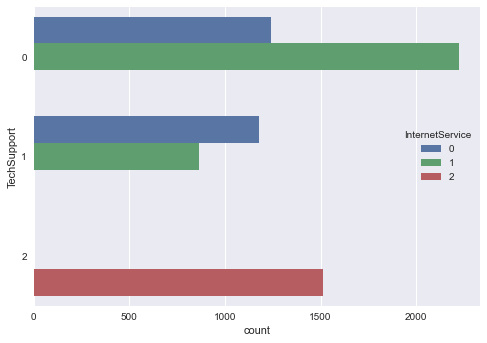

In [481]:
#TechSupport vs InternetService
sns.countplot(y='TechSupport', hue='InternetService', data=df)
#users who have opted for no tech support from DSL and optic cables are more than the users who have opted for
#tech support from DSL and optic cables

<AxesSubplot:xlabel='count', ylabel='StreamingTV'>

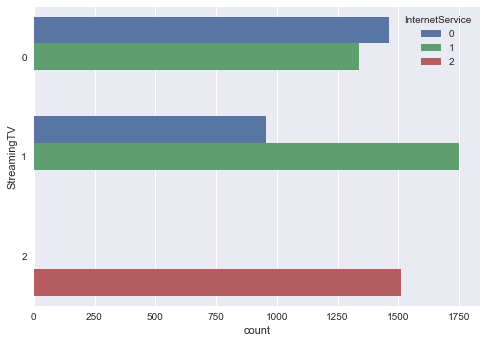

In [482]:
#StreamingTV vs InternetService
sns.countplot(y='StreamingTV', hue='InternetService', data=df)
#users who have not opted for streaming TV from DSL and optic cable are more than
#the users who have opted for the same from DSL and optic cable

<AxesSubplot:xlabel='count', ylabel='StreamingMovies'>

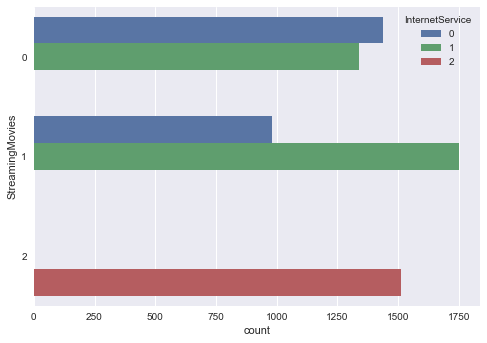

In [483]:
#StreamingMovies vs InternetService
sns.countplot(y='StreamingMovies', hue='InternetService', data=df)
#users who have not opted for streaming movies from DSL are more then the users who have opted for streaming movies via DSL
#users who have opted for streaming movies from #fibre optic are more than the users who have not
#Fibre optic is popular for its movie streaming services 

<AxesSubplot:xlabel='count', ylabel='StreamingMovies'>

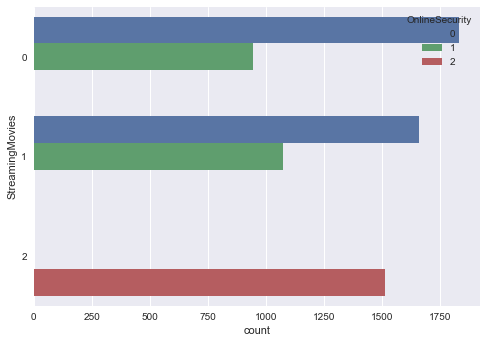

In [484]:
#StreamingMovies vs OnlineSecurity
sns.countplot(y='StreamingMovies', hue='OnlineSecurity', data=df)

In [485]:
#tech support n online security

#Users who have opted for no tech support have no online security as compared to those who  have opted for tech support
#Users who have opted for tech support have more online security than others

<AxesSubplot:xlabel='count', ylabel='TechSupport'>

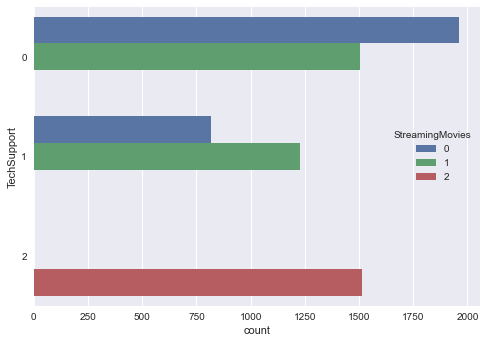

In [486]:
#tech support n streaming movies
sns.countplot(y='TechSupport', hue='StreamingMovies', data=df)

<AxesSubplot:xlabel='count', ylabel='TechSupport'>

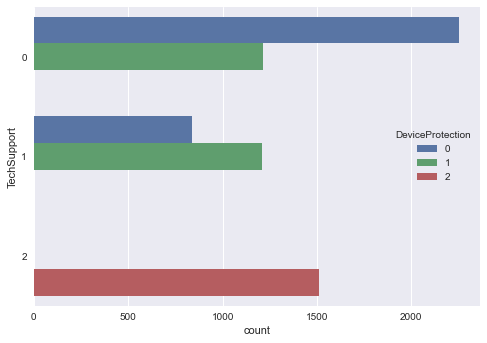

In [487]:
#tech support  and device protection
sns.countplot(y='TechSupport', hue='DeviceProtection', data=df)

<AxesSubplot:xlabel='count', ylabel='StreamingMovies'>

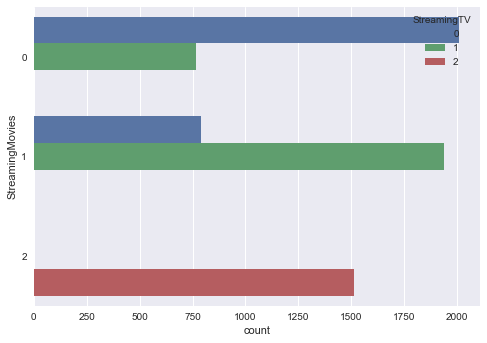

In [488]:
#streaming movie n streaming tv
sns.countplot(y='StreamingMovies', hue='StreamingTV', data=df)
#Majority of people who have opted for streaming movies have also opted for streaming TV

<AxesSubplot:xlabel='count', ylabel='TechSupport'>

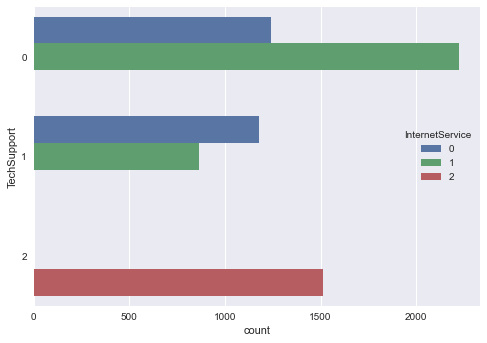

In [489]:
#tech support, in terner service,
sns.countplot(y='TechSupport', hue='InternetService', data=df)
#majority of people have opted for Internet service with no tech suppport

<AxesSubplot:xlabel='count', ylabel='OnlineBackup'>

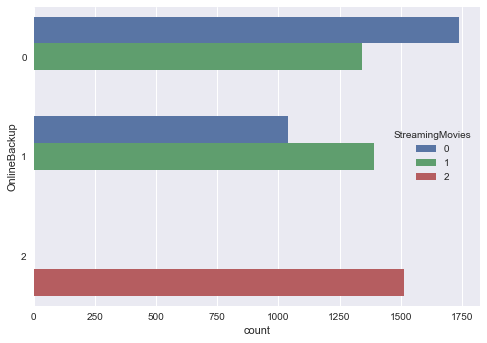

In [490]:
#online backup n streaming movies
sns.countplot(y='OnlineBackup', hue='StreamingMovies', data=df)

<AxesSubplot:xlabel='count', ylabel='OnlineBackup'>

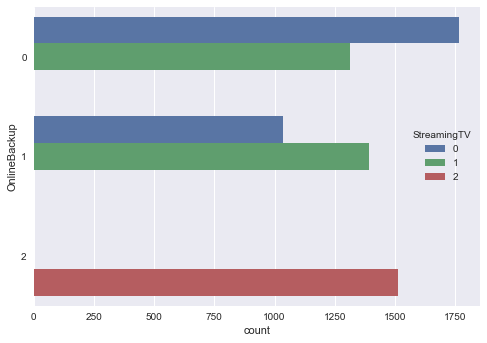

In [491]:
#online backup n streaming TV
sns.countplot(y='OnlineBackup', hue='StreamingTV', data=df)

<AxesSubplot:xlabel='count', ylabel='OnlineBackup'>

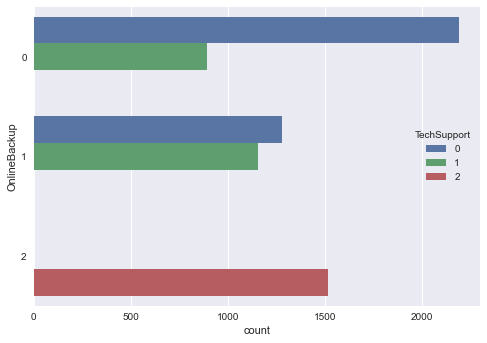

In [492]:
#online backup n tech support
sns.countplot(y='OnlineBackup', hue='TechSupport', data=df)

<AxesSubplot:xlabel='count', ylabel='OnlineBackup'>

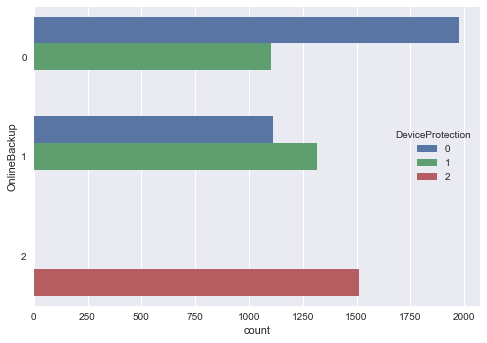

In [493]:
#onlne backup n device protection
sns.countplot(y='OnlineBackup', hue='DeviceProtection', data=df)

<AxesSubplot:xlabel='count', ylabel='StreamingMovies'>

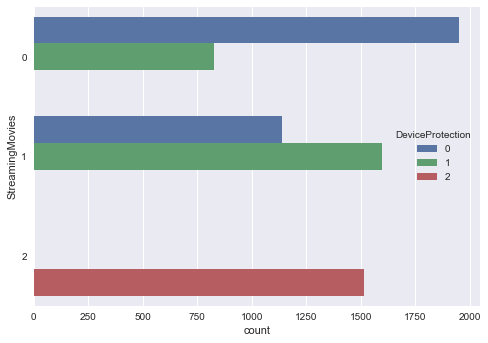

In [494]:
#device protection n movie streaming
sns.countplot(y='StreamingMovies', hue='DeviceProtection', data=df)

<AxesSubplot:xlabel='count', ylabel='StreamingTV'>

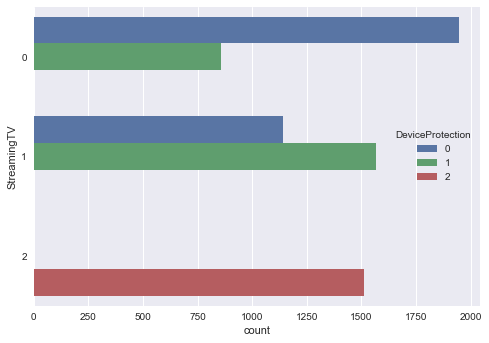

In [495]:
#device protection n streaming tv
sns.countplot(y='StreamingTV', hue='DeviceProtection', data=df)

<AxesSubplot:xlabel='count', ylabel='OnlineSecurity'>

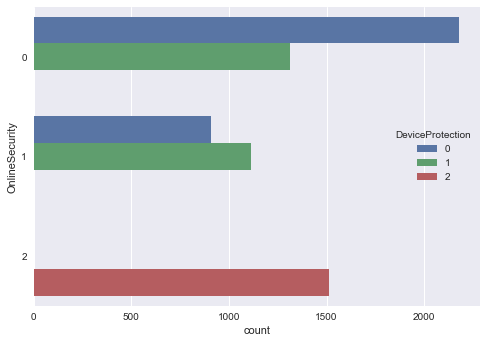

In [496]:
#device protetcion n online scurity.
sns.countplot(y='OnlineSecurity', hue='DeviceProtection', data=df)

ValueError: num must be 1 <= num <= 9, not 10

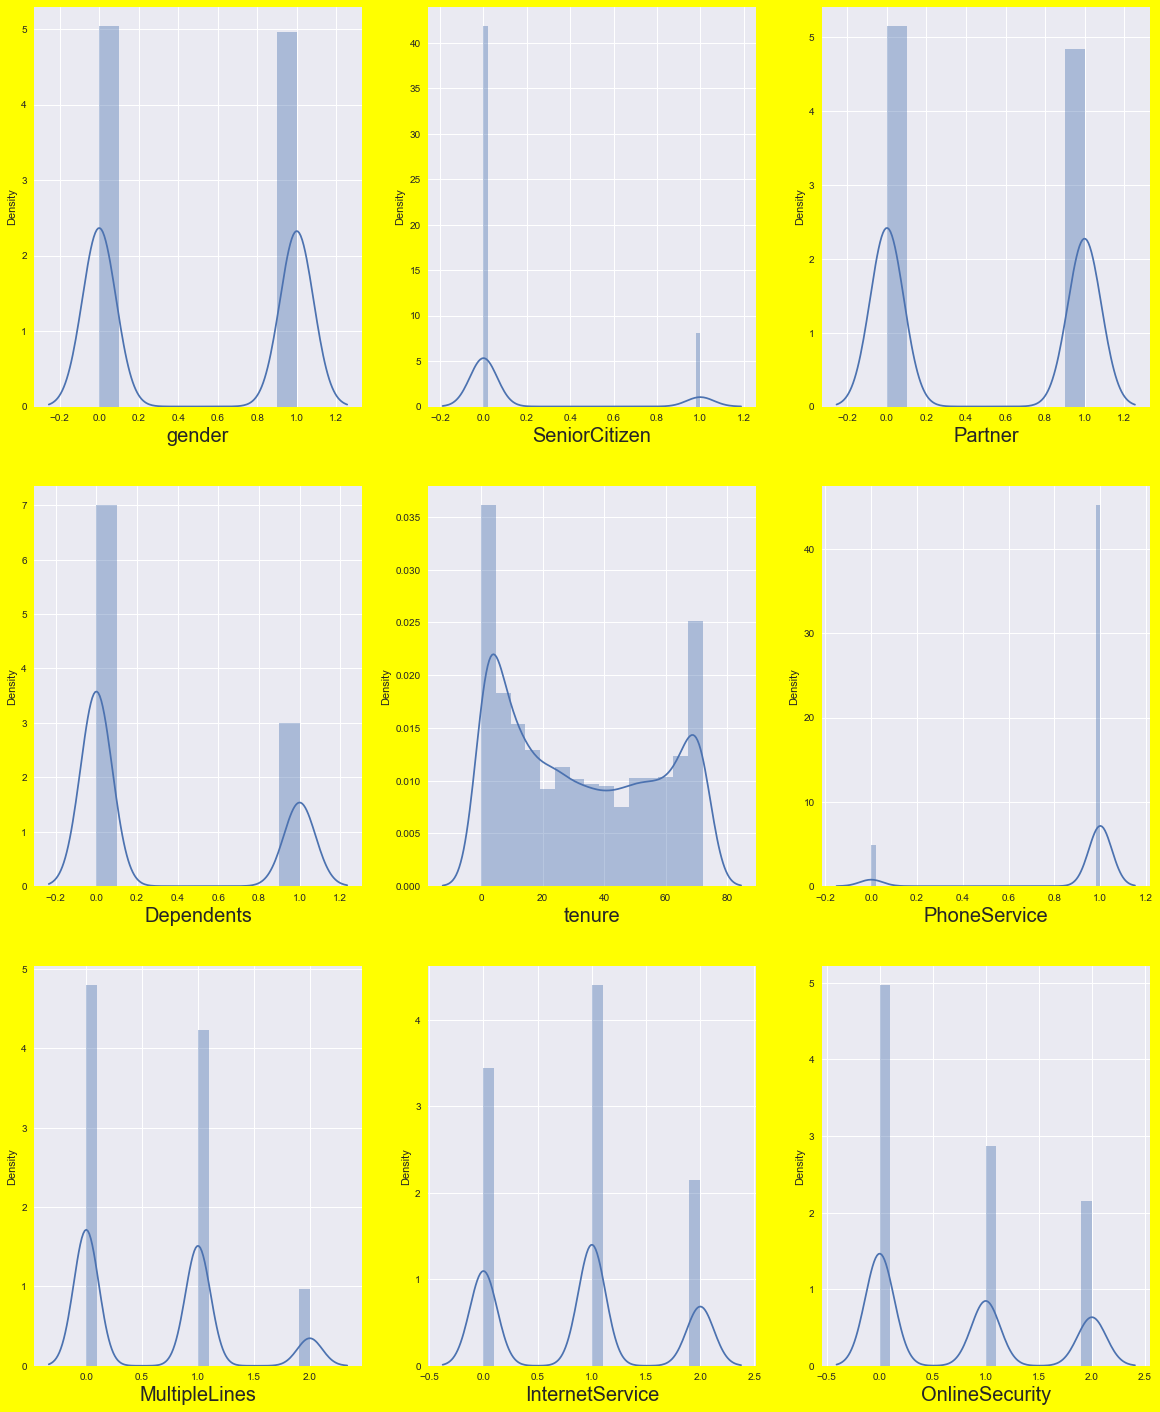

In [497]:
#EDA for continous data
#Let's see how data is distributed for every column
plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber=1
for column in df:
    if plotnumber <= 20: #column is 10 in number
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+= 1
plt.show()


In [ ]:
df.skew().sort_values(ascending=False)

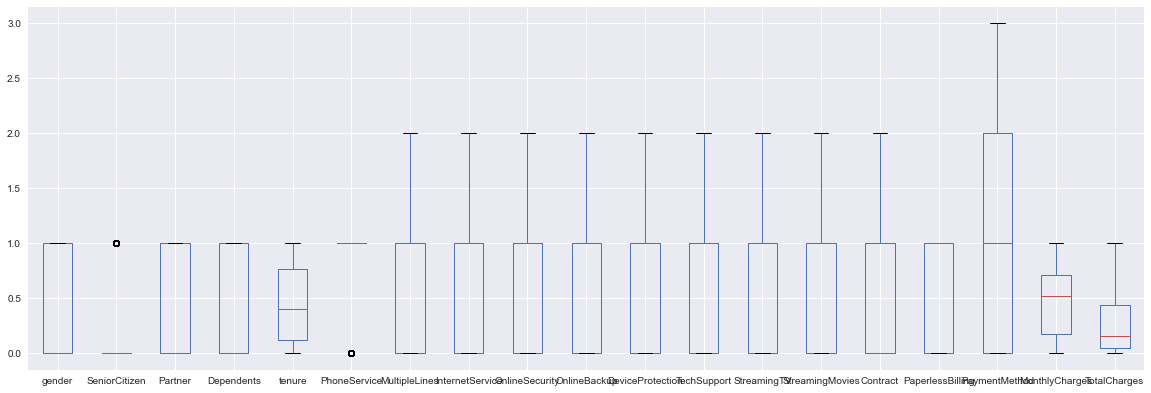

In [500]:
#Plotting boxplots for first 30 columns
x.iloc[:,0:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

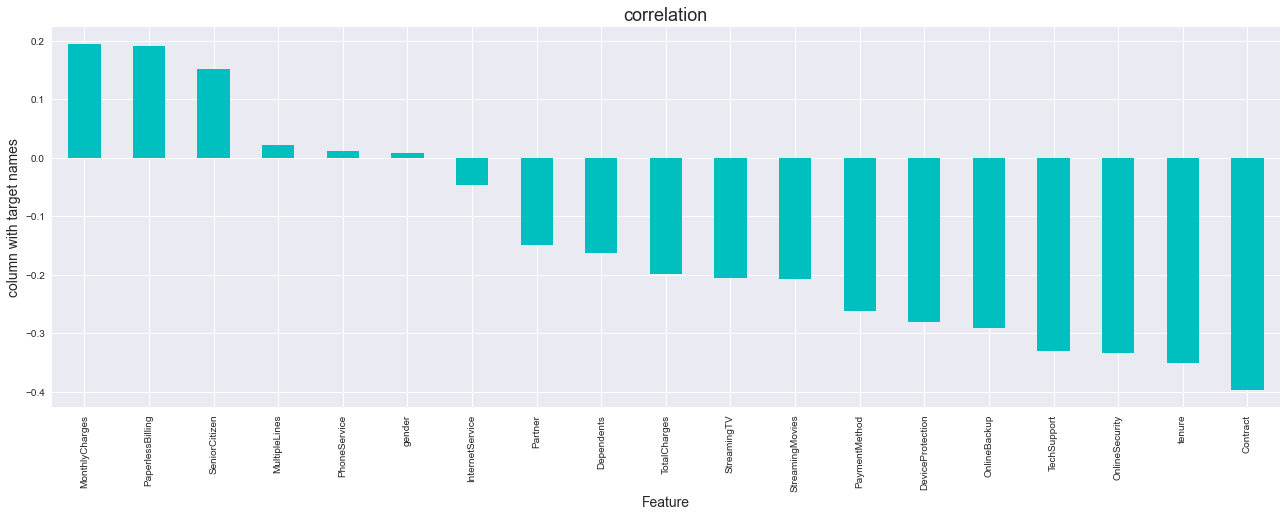

In [501]:
#REALATION WITH CHURN
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(["Churn"]).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

In [502]:
#monthly charges and paperless billing have an impact on churn
#contract and tenure have a negative correlation with Churn

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

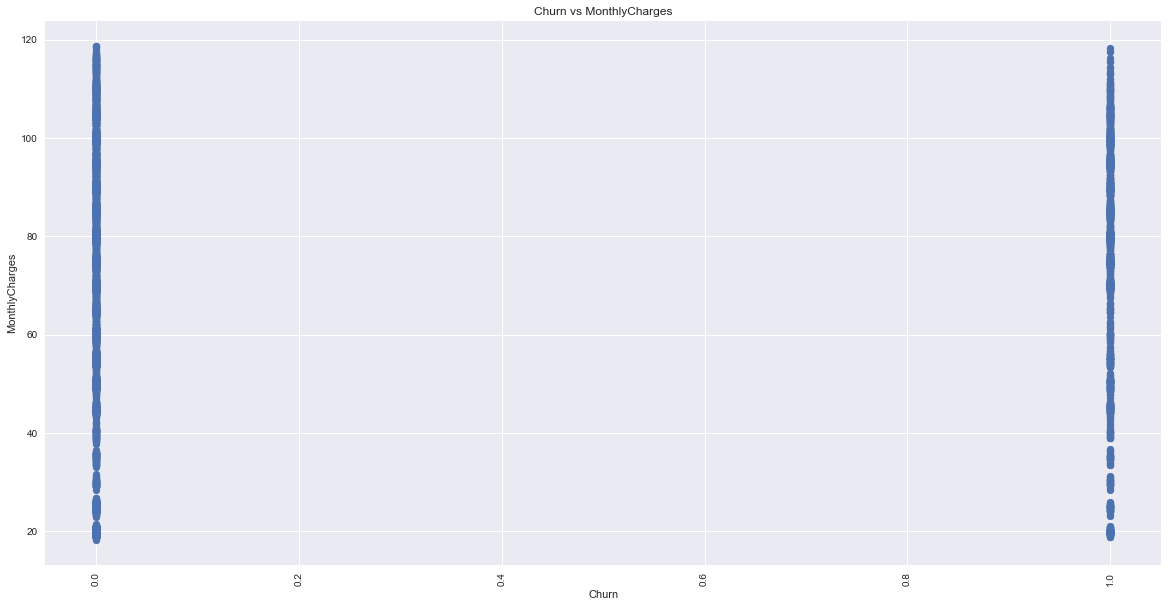

In [499]:
#MonthlyCharges vs Churn
plt.figure(figsize = (20,10))
plt.title('Churn vs MonthlyCharges')
plt.scatter(df['Churn'], df['MonthlyCharges'])
plt.xticks
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.xticks(rotation = 90)
#there is not much realtion between the two

In [503]:
#RELATION WITH PRIMARY FUEL
corr_matrix=df.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.194508
PaperlessBilling    0.190891
SeniorCitizen       0.151619
MultipleLines       0.021373
PhoneService        0.011323
gender              0.008763
InternetService    -0.047366
Partner            -0.149135
Dependents         -0.163459
TotalCharges       -0.198306
StreamingTV        -0.205022
StreamingMovies    -0.206533
PaymentMethod      -0.261892
DeviceProtection   -0.281312
OnlineBackup       -0.291349
TechSupport        -0.330149
OnlineSecurity     -0.333144
tenure             -0.351508
Contract           -0.396531
Name: Churn, dtype: float64

In [504]:
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df[column].min()
        # maximum value of the column
        max_column = df[column].max()
        # min max scaler
        df[column] = (df[column] - min_column) / (max_column - min_column)   


In [505]:
# select independent variables
x = df.drop(columns='Churn')

# select dependent variables
y = df.loc[:, 'Churn']

print(x.columns)

print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
Churn


In [506]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [507]:
from sklearn.model_selection import train_test_split
lr=LogisticRegression()

In [508]:
#Splitting the dataframe:
for i in range(0,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random_state state",i,"The model performs very well")
        print("At random_state state:-",i)
        print("Training accuracy_score is:-", round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random_state state 1 The model performs very well
At random_state state:- 1
Training accuracy_score is:- 80.3
Testing accuracy_score is:- 80.3 


At random_state state 29 The model performs very well
At random_state state:- 29
Training accuracy_score is:- 80.6
Testing accuracy_score is:- 80.6 


At random_state state 88 The model performs very well
At random_state state:- 88
Training accuracy_score is:- 80.6
Testing accuracy_score is:- 80.6 


At random_state state 106 The model performs very well
At random_state state:- 106
Training accuracy_score is:- 80.6
Testing accuracy_score is:- 80.6 


At random_state state 189 The model performs very well
At random_state state:- 189
Training accuracy_score is:- 80.5
Testing accuracy_score is:- 80.5 


At random_state state 194 The model performs very well
At random_state state:- 194
Training accuracy_score is:- 80.6
Testing accuracy_score is:- 80.6 


At random_state state 215 The model performs very well
At random_state state:- 215
Trainin

In [509]:
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.25, random_state=29)

In [510]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier 
svm=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier 
 
print("Model is created")

Model is created


In [511]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
print("Model is trained")

Model is trained


In [512]:
print("Lr classification score",lr.score(x_train,y_train))
print("knn classification score",knn.score(x_train,y_train))
print("dt classification score",dt.score(x_train,y_train))
print("rf classification score",rf.score(x_train,y_train))
print("adb classification score",adb.score(x_train,y_train))
print("svm classification score",svm.score(x_train,y_train))
print("gdboost classification score",gdboost.score(x_train,y_train))

Lr classification score 0.8058879392212726
knn classification score 0.8326685660018993
dt classification score 0.9979107312440646
rf classification score 0.9979107312440646
adb classification score 0.8087369420702754
svm classification score 0.8151946818613486
gdboost classification score 0.8307692307692308


In [513]:
#classification report
lr_yprad = lr.predict(x_test)
knn_yprad = knn.predict(x_test)
dt_yprad = dt.predict(x_test)
rf_yprad = rf.predict(x_test)
adb_yprad = adb.predict(x_test)
svm_yprad = svm.predict(x_test)
gdboost_yprad = gdboost.predict(x_test)


In [514]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
#importing the ric and auc from sklearn and predect the x_test and 
#checking the roc_auc_score
print(roc_auc_score(y_test,lr.predict(x_test)))
print(roc_auc_score(y_test,knn.predict(x_test)))
print(roc_auc_score(y_test,dt.predict(x_test)))
print(roc_auc_score(y_test,rf.predict(x_test)))
print(roc_auc_score(y_test,adb.predict(x_test)))
print(roc_auc_score(y_test,svm.predict(x_test)))
print(roc_auc_score(y_test,gdboost.predict(x_test)))

0.7308550063683799
0.681203007518797
0.6456962077324458
0.6995480504540038
0.729648711943794
0.7158108385718394
0.7311746579563664


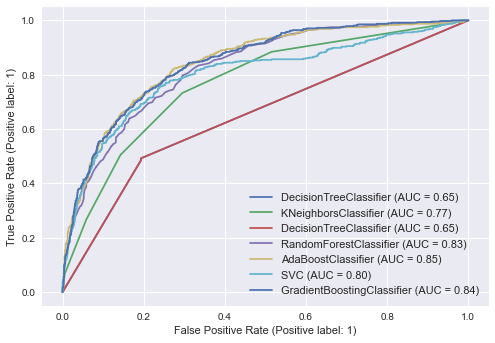

In [515]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,X_test,y_test)
  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,x_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

In [516]:
#CROSS VALIDATION
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True) #from above data
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [517]:
#GDB BOOST MODEL FOR CROSS VALIDATION
print("Mean of Cross validation score for gdboost model","=>",cross_val_score(gdboost,x,y,cv=6).mean())

Mean of Cross validation score for gdboost model => 0.8021647312424425


In [518]:
#Ada Boost
print("Mean of Cross validation score for Adaboost model","=>",cross_val_score(adb,x,y,cv=6).mean())

Mean of Cross validation score for Adaboost model => 0.8041578167538884


In [519]:
#random forest
print("Mean of Cross validation score for Random Forest model","=>",cross_val_score(rf,x,y,cv=6).mean())

Mean of Cross validation score for Random Forest model => 0.7900589020998927


In [520]:
#TUNING WITH RANDOM FOREST
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [521]:
params = {'n_estimators': [47,50,60,70], 'max_leaf_nodes': range(2,4), 'min_samples_split':range(3,10), 'max_depth': range(10,15)}

In [522]:
rfgridsearch = GridSearchCV(rf, param_grid = params , cv=6, n_jobs = -1)
rfgridsearch.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_split': range(3, 10),
                         'n_estimators': [47, 50, 60, 70]})

In [523]:
rfgridsearch.best_estimator_

RandomForestClassifier(max_depth=14, max_leaf_nodes=3, min_samples_split=6,
                       n_estimators=60)

In [524]:
rf_clf=RandomForestClassifier(
    n_estimators=47, max_depth=10, min_samples_split=7)
rf_clf.fit(x_train, y_train)
rfpred=rf_clf.predict(x_train)
rf_clf_report=pd.DataFrame(
    classification_report(y_train, rfpred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_train, rfpred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, rfpred)} \n")

#***********************Test score******************************************
rfpred=rf_clf.predict(x_test)
clf_report = pd.DataFrame(
    classification_report(y_test, rfpred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, rfpred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, rfpred)}\n")


================Train Result======================
Accuracy Score: 87.60%
____________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.891420     0.820018  0.875973     0.855719      0.872678
recall        0.947206     0.675832  0.875973     0.811519      0.875973
f1-score      0.918467     0.740976  0.875973     0.829721      0.871877
support    3883.000000  1382.000000  0.875973  5265.000000   5265.000000
____________________________________________________
Confusion Matrix: 
 [[3678  205]
 [ 448  934]] 


=================Test Result ==========================
Accuracy Score: 80.64%
____________________________________________________
CLASSIFICATION REPORT: 
                     0           1  accuracy    macro avg  weighted avg
precision     0.838733    0.683924  0.806378     0.761328      0.796857
recall        0.909446    0.528421  0.806378     0.718933      0.806378
f1-score 

In [525]:
#ADABOOST HYPERTUNING

In [526]:
adb.get_params().keys() 

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [527]:
params = {'n_estimators': [47,50,60,70], 'learning_rate': [0.1, 0.25,0.30,0.40]}

In [528]:
Adagridsearch = GridSearchCV(adb, param_grid = params , cv=4)
Adagridsearch.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.25, 0.3, 0.4],
                         'n_estimators': [47, 50, 60, 70]})

In [529]:
ADpred=Adagridsearch.predict(x_train)

In [530]:
Adagridsearch.best_estimator_

AdaBoostClassifier(learning_rate=0.4, n_estimators=70)

In [531]:
adb_clf=AdaBoostClassifier(
    n_estimators=50, learning_rate=0.5)
adb_clf.fit(x_train, y_train)
ADpred=adb_clf.predict(x_train)
adb_clf_report=pd.DataFrame(
    classification_report(y_train, ADpred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_train, ADpred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{adb_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, ADpred)} \n")

#***********************Test score******************************************
ADpred=adb_clf.predict(x_test)
clf_report = pd.DataFrame(
    classification_report(y_test, ADpred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, ADpred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, ADpred)}\n")


================Train Result======================
Accuracy Score: 80.91%
____________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.848426     0.666079  0.809117     0.757253      0.800562
recall        0.902395     0.547033  0.809117     0.724714      0.809117
f1-score      0.874579     0.600715  0.809117     0.737647      0.802693
support    3883.000000  1382.000000  0.809117  5265.000000   5265.000000
____________________________________________________
Confusion Matrix: 
 [[3504  379]
 [ 626  756]] 


=================Test Result ==========================
Accuracy Score: 80.75%
____________________________________________________
CLASSIFICATION REPORT: 
                     0           1  accuracy    macro avg  weighted avg
precision     0.850037    0.667482  0.807517     0.758759      0.800656
recall        0.893833    0.574737  0.807517     0.734285      0.807517
f1-score 

In [532]:
#with gradient boosting
parm_grid  = {'max_depth' : [3,4],
              'max_leaf_nodes' : [4],
              'learning_rate': [0.1],
              'random_state' : [4,5]}

In [533]:
gridsearch = GridSearchCV(gdboost, param_grid = parm_grid , cv=6)

In [534]:
#fit the model using given paramters
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 4],
                         'max_leaf_nodes': [4], 'random_state': [4, 5]})

In [535]:
gridsearch.best_params_
#printing the best parameters 
#{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 4, 'random_state': 4}

{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 4, 'random_state': 4}

In [536]:
gdboost_tuning=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,max_leaf_nodes=4,random_state=4)
#supplying best parameters to our model

In [537]:
#supplying best parameters to our model
gdboost_tuning.fit(x_train,y_train)

GradientBoostingClassifier(max_leaf_nodes=4, random_state=4)

In [538]:
#predicting the values using test data
gdboost_tuning_yprad = gdboost_tuning.predict(x_test)

In [539]:
#printing the classification report
gdboost_report = classification_report(y_test,gdboost_tuning_yprad)
print(" gboost classification_report" ,'\n',gdboost_report)

 gboost classification_report 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1281
           1       0.68      0.53      0.60       475

    accuracy                           0.81      1756
   macro avg       0.76      0.72      0.74      1756
weighted avg       0.80      0.81      0.80      1756



In [540]:

# Check the accuracy
accuracy_score(y_test,gdboost_tuning_yprad) #it is still giving same value, no increase

0.806378132118451

In [541]:
#xgb
import xgboost as xgb
xgb=xgb.XGBRegressor()

In [542]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [543]:
y_pred=xgb.predict(x_test)

In [544]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,y_pred)
#Tune the parameters and check if you can increase the score

0.19375396773450404

In [545]:
#it is not making much of a difference with grid cv, so decided to try RandomSearchCV

In [393]:
!pip install RandomSearchCV


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



ERROR: Could not find a version that satisfies the requirement RandomSearchCV (from versions: none)
ERROR: No matching distribution found for RandomSearchCV


In [546]:
from sklearn.model_selection import RandomizedSearchCV

In [547]:
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}

In [548]:
# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(x_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 90, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 4}


In [549]:
Gradientboost_tuning=GradientBoostingClassifier(n_estimators=115,min_samples_split=5,max_depth=3)
#supplying best parameters to our model

In [550]:
#supplying best parameters to our model
Gradientboost_tuning.fit(x_train,y_train)

GradientBoostingClassifier(min_samples_split=5, n_estimators=115)

In [551]:
#predicting the values using test data
Gradientboost_tuning_yprad = Gradientboost_tuning.predict(x_test)

In [552]:
#printing the classification report
Gradientboost_report = classification_report(y_test,Gradientboost_tuning_yprad)
print(" gboost classification_report" ,'\n',Gradientboost_report)

 gboost classification_report 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1281
           1       0.68      0.54      0.60       475

    accuracy                           0.81      1756
   macro avg       0.76      0.72      0.74      1756
weighted avg       0.80      0.81      0.80      1756



In [553]:
# Check the accuracy
accuracy_score(y_test,Gradientboost_tuning_yprad)

0.8080865603644647

In [554]:
#RandomCV for ADABOOST
params = {'n_estimators': [47,50,60,70], 'learning_rate': [0.1, 0.25,0.30,0.40]} #estimators can be any rate, u can also keep a range of (30, 200)
#learning rate always starts with 0.01 or 0.1, however these nuners should not cross 1. it shd be < 1

In [555]:
rnd_srch=RandomizedSearchCV(AdaBoostClassifier(), cv=5, param_distributions=params)

In [556]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [557]:
rnd_srch.best_estimator_

AdaBoostClassifier(learning_rate=0.3, n_estimators=70)

In [561]:
ada=AdaBoostClassifier(learning_rate=0.3,n_estimators=70)
ada.fit(x_train,y_train) #this is our score
ADy_pred= ada.predict(x_test)
print ('*****accuracy post tuning*****')
print (metrics.r2_score(y_test,y_pred))

*****accuracy post tuning*****
0.19375396773450404


In [562]:
#thus we can conclude that random CV method is slightly between, however not much difference in the scores

In [563]:
#The Gradient boosting via grid search CV  with 80.8 or 81% accuracy and
#Random forest is the cecond best  best model with 80% accuracy. There is not much change in percentage after hyper tuning methods by random cv and grid serach cv

In [564]:
#Churn data says: No:5164 || Yes:1857
#Majority of the prople are sticling to their scubscription,  hpwever there is a churn of 26%.

In [565]:
Gradientboost_tuning=gdboost.fit(x_train,y_train)

In [566]:
import pickle as pkl
Telecom_Churn_Model='Telecom_Churn.pickle'
pkl.dump(Gradientboost_tuning, open(Telecom_Churn_Model,'wb'))